## Prepare Notebook

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

## Read Data

In [65]:
raw_data_df = pd.read_csv('../../../data/sample_data_1.csv')

raw_data_df.head()

,date,media,sales
0,2018-01-03,0.0,6.258472
1,2018-01-04,0.0,6.170889
2,2018-01-05,0.0,5.754669
3,2018-01-06,0.0,5.968413
4,2018-01-07,0.0,5.285262


In [66]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1367 non-null   object 
 1   media   1367 non-null   float64
 2   sales   1275 non-null   float64
dtypes: float64(2), object(1)
memory usage: 32.2+ KB


## Data Preparation

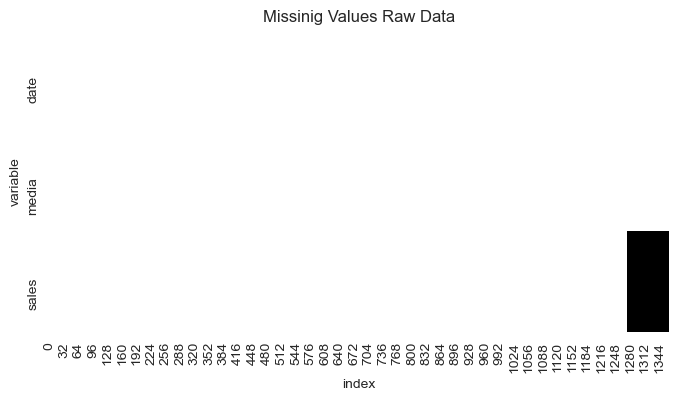

In [67]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(data=raw_data_df.isna().T, cmap='binary', cbar=False, ax=ax)
ax.set(title='Missinig Values Raw Data', xlabel='index', ylabel='variable');

In [123]:
data_df = raw_data_df \
    .query('sales.notnull()') \
    .assign(
        date = lambda x: pd.to_datetime(x['date']),
        year = lambda x: x['date'].dt.year,
        month = lambda x: x['date'].dt.month,
        day = lambda x: x['date'].dt.day,
        dayofyear = lambda x: x['date'].dt.dayofyear,
        sales_na = lambda x: x['sales']
    )

data_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1275 non-null   datetime64[ns]
 1   media      1275 non-null   float64       
 2   sales      1275 non-null   float64       
 3   year       1275 non-null   int64         
 4   month      1275 non-null   int64         
 5   day        1275 non-null   int64         
 6   dayofyear  1275 non-null   int64         
 7   sales_na   1275 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 89.6 KB


In [124]:
# Generate missnig values. 
data_df['is_na_mask'] = np.random.binomial(n=1, p=0.1, size=data_df.shape[0]).astype('bool')
data_df.loc[data_df['is_na_mask'], 'sales_na'] = np.nan

## Data Visualization

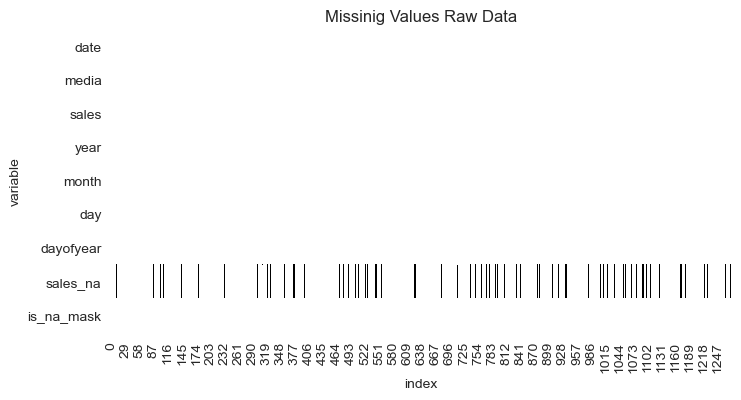

In [125]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(data=data_df.isna().T, cmap='binary', cbar=False, ax=ax)
ax.set(title='Missinig Values Raw Data', xlabel='index', ylabel='variable');

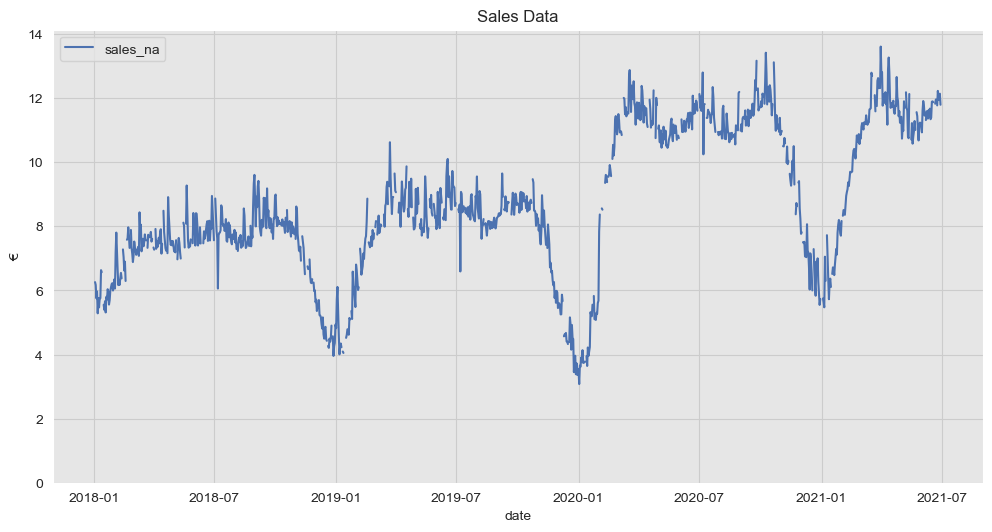

In [126]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='sales_na', data=data_df, color=sns_c[0], label='sales_na', ax=ax)
ax.set(title='Sales Data', xlabel='date', ylabel='€', ylim=(0, None));

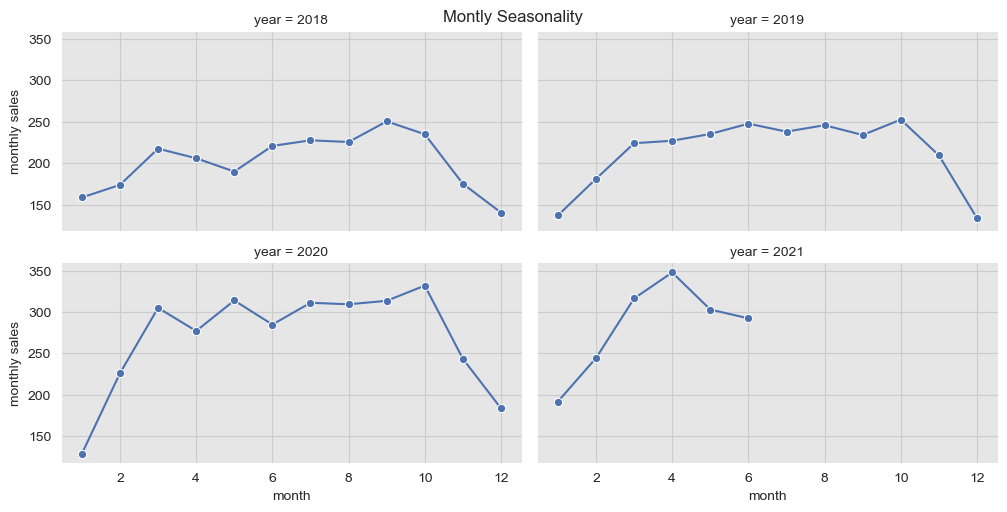

In [131]:
g = sns.relplot(
    data=data_df,
    x='month', 
    y='sales_na', 
    col='year', 
    kind='line', 
    estimator='sum',
    marker='o',
    col_wrap=2, 
    height=2.5, 
    aspect=2, 
    legend=True
)
g.set_axis_labels('month', 'monthly sales')
g.fig.suptitle('Montly Seasonality');

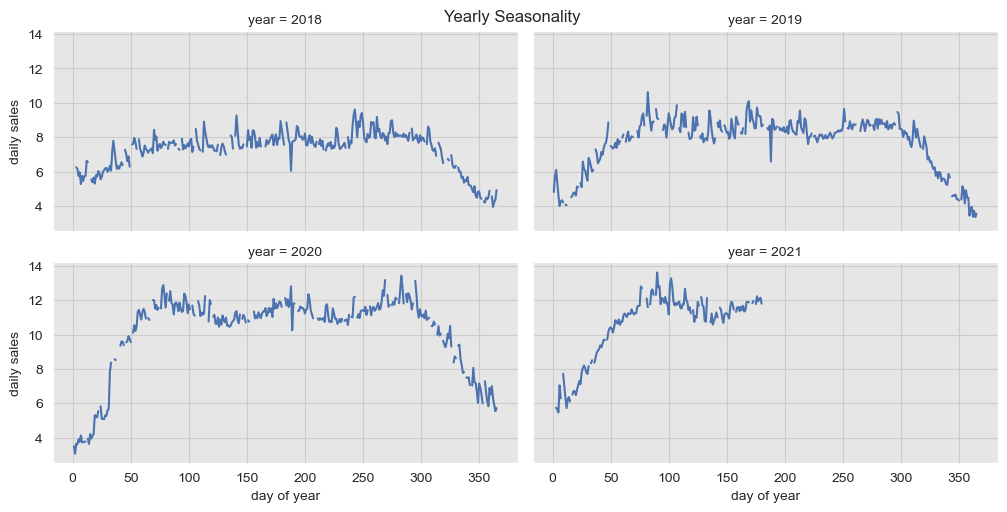

In [136]:
g = sns.relplot(
    data=data_df,
    x='dayofyear', 
    y='sales_na', 
    col='year', 
    kind='line', 
    estimator=None,
    col_wrap=2, 
    height=2.5, 
    aspect=2, 
    legend=True
)
g.set_axis_labels('day of year', 'daily sales')
g.fig.suptitle('Yearly Seasonality');

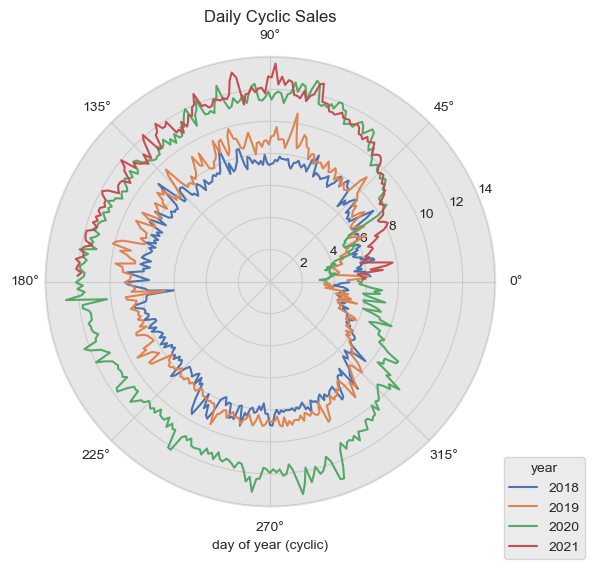

In [165]:
ax = plt.subplot(111, projection='polar')

data_df \
    .assign(
        day_of_year_cyclic = lambda x: x['dayofyear'].transform(lambda x: 2*np.pi*x/365.5),
        year = lambda x: x['year'].astype('str')
    ) \
    .pipe((sns.lineplot, 'data'), 
        x='day_of_year_cyclic', 
        y='sales', 
        hue='year',
        ax=ax
    )

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0))
ax.set(title='Daily Cyclic Sales', ylabel='', xlabel='day of year (cyclic)');